In [1]:
import numpy as np                
from matplotlib import colors     
from sklearn import svm            
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]

In [3]:
data_path='C:\iris\iris'  

In [4]:
data = np.loadtxt(data_path,                                
                  dtype=float,                              
                  delimiter=',',                            
                  converters={4:iris_type}) 

In [5]:
x, y = np.split(data,                                      
                (4,),                                       
                axis=1)      

In [6]:
x = x[:, 0:2]                                              
#print(x)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,              
                                                               y,             
                                                               random_state=1, 
                                                               test_size=0.3)  

In [7]:
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,                         
                  kernel='linear',               
                  decision_function_shape='ovr') 
    return clf

In [8]:
clf = classifier()

In [9]:
def train(clf,x_train,y_train):
    clf.fit(x_train,         
            y_train.ravel()) 

In [10]:
def train(clf,x_train,y_train):
    clf.fit(x_train,         
            y_train.ravel()) 

In [11]:
train(clf,x_train,y_train)

In [12]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' %(tip, np.mean(acc)))

In [13]:
def print_accuracy(clf,x_train,y_train,x_test,y_test):
    print('trianing prediction:%.3f' %(clf.score(x_train, y_train)))
    print('test data prediction:%.3f' %(clf.score(x_test, y_test)))
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    print('decision_function:\n', clf.decision_function(x_train))

In [14]:
print_accuracy(clf,x_train,y_train,x_test,y_test)

trianing prediction:0.819
test data prediction:0.778
traing data Accuracy:0.819
testing data Accuracy:0.778
decision_function:
 [[-0.30200388  1.26702365  2.28292526]
 [ 2.1831931  -0.19913458  1.06956422]
 [ 2.25424706  0.79489006 -0.20587224]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 0.95815482  2.18401419 -0.17375192]
 [ 2.23120771  0.84075865 -0.19144453]
 [ 2.17327158 -0.14884286  0.92795057]
 [-0.28667175  1.11372202  2.28302495]
 [-0.27989264  1.21274017  2.25881762]
 [-0.29313813  1.24442795  2.2732035 ]
 [-0.27008816  1.2272086   2.22682127]
 [-0.25981661  2.21998499  1.20479842]
 [-0.17071168  0.99542159  2.17180911]
 [-0.30018876  1.25829325  2.2829419 ]
 [-0.17539342  2.15368837  1.06772814]
 [ 2.25702986  0.81715893 -0.22763295]
 [-0.23988847  2.23286001  1.06656755]
 [-0.26915223  2.23333222  1.21679709]
 [ 2.22927055  0.98556708 -0.22777916]
 [ 2.2530903   0.85932358 -0.2359772 ]
 [-0.26740532  1.20784059  2.23528903]
 [ 2.26803658  0.80468578 -0.24299359]
 [-0.24030826 

In [15]:
def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()               
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()               
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]   
    grid_test = np.stack((x1.flat, x2.flat), axis=1)            
    print('grid_test:\n', grid_test)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)
    
    grid_hat = clf.predict(grid_test)                          
    print('grid_hat:\n', grid_hat)  
    grid_hat = grid_hat.reshape(x1.shape)                       
                                                                 
 
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b', 'r'])
 
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)                                   
                                                                                      
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) 
    plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolor='none', zorder=10)      
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

grid_test:
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
the distance to decision plane:
 [[ 2.17689921  1.23467171 -0.25941323]
 [ 2.17943684  1.23363096 -0.25941107]
 [ 2.18189345  1.23256802 -0.25940892]
 ...
 [-0.27958977  0.83621535  2.28683228]
 [-0.27928358  0.8332275   2.28683314]
 [-0.27897389  0.83034313  2.28683399]]
grid_hat:
 [0. 0. 0. ... 2. 2. 2.]


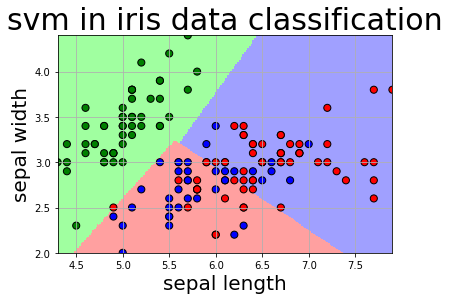

In [16]:
draw(clf,x)